In [6]:
import pandas as pd  
import numpy as np  

# Data visualization
import matplotlib.pyplot as plt  
import seaborn as sns   
import plotly.express as px

# Machine learning
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.linear_model import LinearRegression, Ridge    # Linear Regression model
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
path=r"C:\Users\B Rakshit Nag\OneDrive\Desktop\WQ HOUSE_PRED\archive\House Price India.csv"
df=pd.read_csv(path)

In [8]:
df.head()


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [ ]:
df.info

<bound method DataFrame.info of                id   Date  number of bedrooms  number of bathrooms  \
0      6762810145  42491                   5                 2.50   
1      6762810635  42491                   4                 2.50   
2      6762810998  42491                   5                 2.75   
3      6762812605  42491                   4                 2.50   
4      6762812919  42491                   3                 2.00   
...           ...    ...                 ...                  ...   
14615  6762830250  42734                   2                 1.50   
14616  6762830339  42734                   3                 2.00   
14617  6762830618  42734                   2                 1.00   
14618  6762830709  42734                   4                 1.00   
14619  6762831463  42734                   3                 1.00   

       living area  lot area  number of floors  waterfront present  \
0             3650      9050               2.0                   0   

In [11]:
df.shape

(14620, 23)

In [ ]:
low,high=df["lot area".quantile(0.05,0.095)]
main_area=df['lot area'].between(low,high)
df=df[main_area]

In [27]:
print(df.columns.tolist())


['id', 'number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 'waterfront present', 'condition of the house', 'grade of the house', 'Area of the house(excluding basement)', 'Area of the basement', 'Renovation Year', 'Lattitude', 'Longitude', 'living_area_renov', 'lot_area_renov', 'Distance from the airport', 'Price']


In [21]:
print(df.columns.tolist())
df.shape


['id', 'number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 'waterfront present', 'condition of the house', 'grade of the house', 'Area of the house(excluding basement)', 'Area of the basement', 'Renovation Year', 'Lattitude', 'Longitude', 'living_area_renov', 'lot_area_renov', 'Number of schools nearby', 'Distance from the airport', 'Price']


(14620, 19)

In [28]:
df.drop(columns=['Renovation Year','Distance from the airport','lot_area_renov'],inplace=True)

In [29]:
df.shape

(14620, 15)

In [38]:
df.drop(columns=['number of floors','lot area'],inplace=True)

In [39]:
print(df.columns.tolist())

['number of bedrooms', 'living area', 'Area of the house(excluding basement)', 'Lattitude', 'Longitude', 'Price']


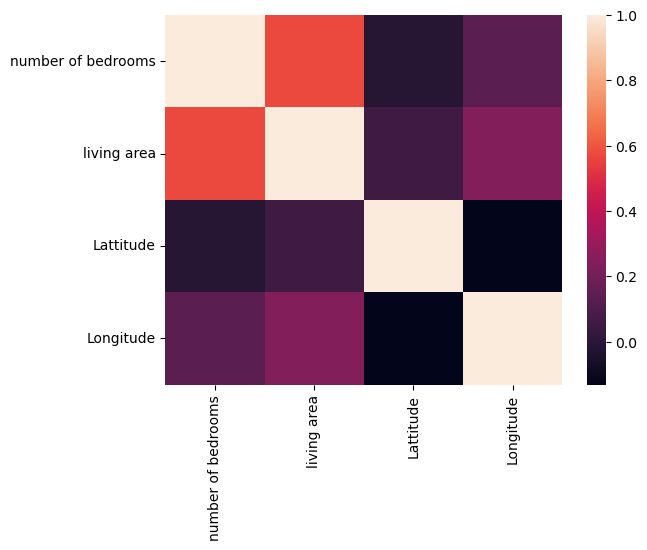

In [45]:
corr=df.select_dtypes('number').drop(columns="Price").corr()
sns.heatmap(corr);

In [42]:
df.drop(columns=['Area of the house(excluding basement)'],inplace=True)

In [44]:
missing_values=df.isnull().sum()
print(missing_values)

number of bedrooms    0
living area           0
Lattitude             0
Longitude             0
Price                 0
dtype: int64


In [47]:
df['living area'].describe()

count    14620.000000
mean      2098.262996
std        928.275721
min        370.000000
25%       1440.000000
50%       1930.000000
75%       2570.000000
max      13540.000000
Name: living area, dtype: float64

Text(0.5, 1.0, 'Distribution of Houses')

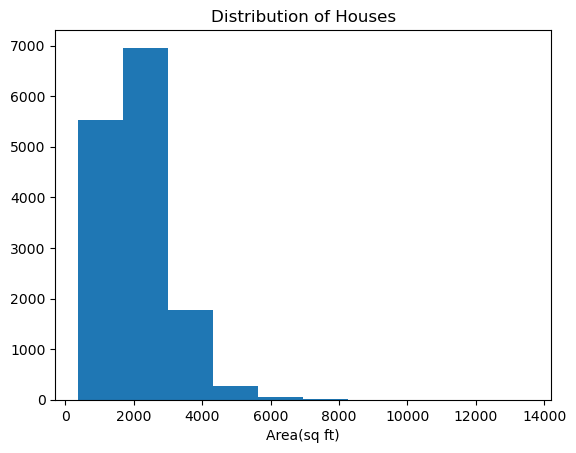

In [50]:
plt.hist(df['living area'],bins=10)
plt.xlabel('Area(sq ft)')
plt.title('Distribution of Houses')

In [52]:
df['Price'].describe()

count    1.462000e+04
mean     5.389322e+05
std      3.675324e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Price, dtype: float64

Text(0.5, 1.0, 'Distribution of Prices')

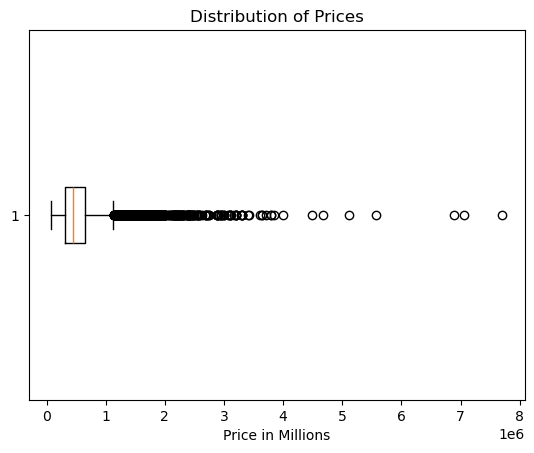

In [55]:
plt.boxplot(df['Price'],vert=False)
plt.xlabel('Price in Millions')
plt.title('Distribution of Prices')

In [56]:
q1=df['Price'].quantile(0.25)
q3=df['Price'].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
df=df[(df['Price']>=lower_bound)&(df['Price']<=upper_bound)]

In [57]:
df["Price"].describe()

count    1.385900e+04
mean     4.770343e+05
std      2.089235e+05
min      7.800000e+04
25%      3.150000e+05
50%      4.375000e+05
75%      6.000000e+05
max      1.130000e+06
Name: Price, dtype: float64

Text(0.5, 1.0, 'Distribution of House Prices')

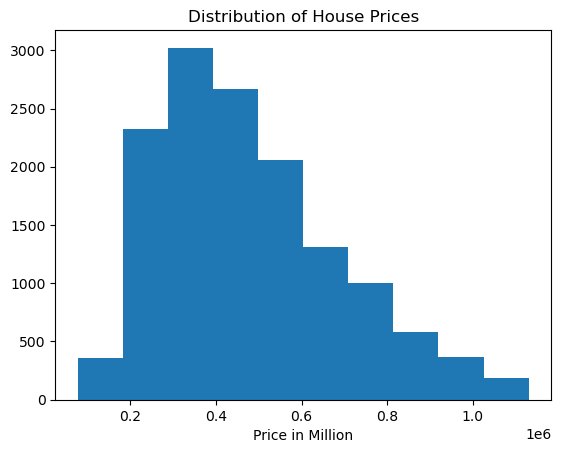

In [59]:
plt.hist(df["Price"], bins=10)
plt.xlabel("Price in Million")
plt.title("Distribution of House Prices")

In [82]:
df = df[df['Price'] < df['Price'].quantile(0.95)]


Text(0.5, 1.0, 'Price vs Area')

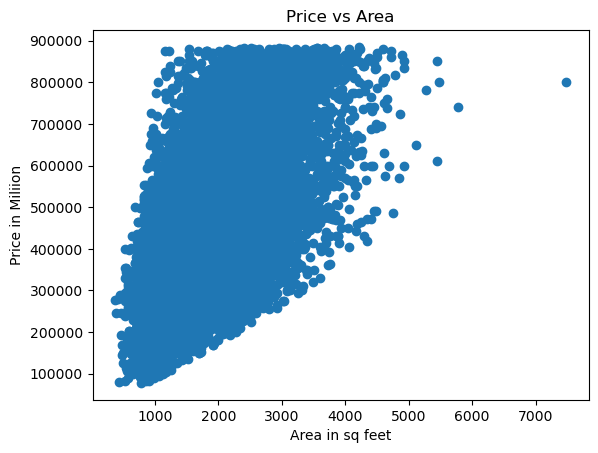

In [83]:
plt.scatter(x=df['living area'],y=df['Price'])
plt.xlabel('Area in sq feet')
plt.ylabel('Price in Miliion')
plt.title('Price vs Area')

In [66]:
fig = px.scatter_mapbox(
    df,
    lat="Lattitude",
    lon="Longitude",
    width=600,
    height=600,
    color="Price",
    hover_data=["Price"]
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()


In [72]:
output='Price'
features=['living area','Lattitude','Longitude','number of bedrooms']
X=df[features]
y=df[output]

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=120)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(9701, 4)
(9701,)
(4158, 4)
(4158,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)


LinearRegression()

In [84]:
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 2: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 3: Print results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 17580701539.54098
R-squared (R²): 0.5869788074265092
